# Decision Tree em Python Baseada em Entropia

**O que são árvores de decisão?**<br/>
É uma ferramenta de apoio a decisão que graficamente apresenta a forma de uma árvore onde a raiz fica na parte superior e as folhas ficam na parte inferior do gráfico.
Definimos um conjunto de regras e para cada regra há uma decisão que precisa ser tomada.
Os nós representam os atributos, os branch (ramos) representam os valores que os atributos podem tomar, e as folhas são as saídas.
As árvores de decisão podem ser usadas para problemas de classificação e de regressão.

<img src='assets/dtree01.png'><br/>
<img src='assets/dtree02.png'>

**Considerações na construção de árvores de decisão**<br/>
* Qual atributo deve ser usado para inicar a árvore?
* Qual deve ser o atributo seguinte?
* Quando parar de construir ramos na árevore (para evitar o overfitting)?

**Temos alguns métodos para ajudar a responder essas questões:**<br/>
* Ganho de informação e Entropia: Entropia é a medida da incerteza nos dados, algo como a bagunça no conjunto de dados. Quanto mais “confusão”, mais difícil será classificar os dados. O ganho de informação é a redução da Entropia.
* Índice de Gini (Gini Index);
* Taxa de ganho (Gain Ratio), redução de variância;

**Processo de aprendizado dos algoritmos de árvore de decisão:**<br/>
<img src='assets/dtree03.png'>

* **Greedy Search (Busca Gananciosa ou Gulosa)**: O algoritmo procura maximizar o passo atual sem olhar para o passo seguinte, a fim de alcançar uma otimização global.

**Como definir o nó raiz e como realizar a divisão do conjunto de dados?**
* Estratégia gulosa (Greedy search)
* Divisão baseada em atributos nominais;
    * Divisão binária;
    * Divisão múltipla;
* Divisão baseada em atributos contínuos;
    * Decisão binária;
    * Discretização;
        * Estática;
        * Dinâmica.

**Entropia**<br/>
Entropia é a medida da incerteza nos dados, algo como a bagunça no conjunto de dados. Quanto mais “confusão”, mais difícil será classificar os dados. O ganho de informação é a redução da Entropia.<br/>
Nos algoritmos ID3, C4.5 e C5.0, o nó raiz é escolhido com base em quanto do total da Entropia é reduzido, se aquele nó é escolhido. Isso é chamado de ganho de informação.<br/>
 A metodologia Entropia é aplicada para computar o ganho de informação para todos os atributos. É escolhido o atributo com o mais alto ganho de informação. Isso é testado para cada node a fim de escolher o melhor nome.<br/>
**ID3 passos:**
1. Começa com todos os exemplos de treino.
2. Então ele escolhe o teste (atributo) que melhor divide os exemplos, ou seja agrupa exemplos da mesma classe ou exemplos semelhantes.
3. Para o atributo escolhido, é criado um nó filho para cada valor possível do atributo.
4. Transporta os exemplos para cada filho considerando o valor filho.
Repete o procedimento para cada filho não “puro”.

**Importante**: O algoritmo ID3 leva em consideração somente os dados categóricos. Enquanto que os algoritmos C4.4, C5.0 e o CART levam em consideração dados categóricos e numéricos.

**Índice de Gini**<br/>
	O índice de Gini é usado para medir a probabilidade de dois itens aleatórios pertencentes à mesma classe. No caso de um conjunto de dados real, esse valor de probabilidade é 1. A medida de Gini de um nó é a soma dos quadrados das proporções das classes.

**Regras de paradas**<br/>
	As regras de paradas são importantes porque os algoritmos de árvores de decisão aproximam um grande número de funções, no entanto, os erros de ruídos podem influenciar gravemente o modelo.
	Regras de parada:
* Índice Gini;
* Qui-quadrado;
* Ganho de informação;
* Redução de variância.

**Pruning (Poda da árvore)**<br/>
* A árvore de decisão é concluída antes que uma classificação perfeita dos dados de treinamento seja alcançada.
* Ocorre o excesso de ajuste nos dados gerando um modelo e, em seguida, a árvore é podada (Pruning) para se tornar generalizável.

O classificador de árvore de decisão do Scikit-Learn não suporta atualmente o Pruning . Pacotes avançados como o XGBoost adotaram a poda de árvores em sua implementação.

## Vejamos a implementação




In [ ]:
#!pip install pydot
#!pip install graphviz

In [3]:
# Importando os módulos
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#!pip install pydot
#!pip install graphviz
#import pydot
#import graphviz
# No Mac: brew install graphviz
# No Windows: http://www.graphviz.org/
# No Linux: http://www.graphviz.org/
from sklearn import tree
import matplotlib.pyplot as plt
import os

In [4]:
# Criando o dataset
instances = [
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Cachorro'}
]

In [5]:
# Transformando o Ddicionário em DataFrame
df = pd.DataFrame(instances)

In [6]:
df

,Melhor Amigo,Especie
0,False,Cachorro
1,True,Cachorro
2,True,Gato
3,True,Gato
4,False,Gato
5,True,Gato
6,True,Gato
7,False,Cachorro
8,True,Gato
9,False,Cachorro


In [7]:
# Preparando os dados de treino e de teste
X_train = [[1] if a else [0] for a in df['Melhor Amigo']]
y_train = [1 if d == 'Cachorro' else 0 for d in df['Especie']]
labels = ['Melhor Amigo']

In [8]:
print (X_train)

[[0], [1], [1], [1], [0], [1], [1], [0], [1], [0], [0], [0], [1], [1]]


In [9]:
print (y_train)

[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]


In [10]:
# Construindo o Classificador
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = DecisionTreeClassifier(max_depth = None, 
                             max_features = None, 
                             criterion = 'entropy', 
                             min_samples_leaf = 1, 
                             min_samples_split = 2)

In [11]:
# Apresentando os datasets ao Classificador
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

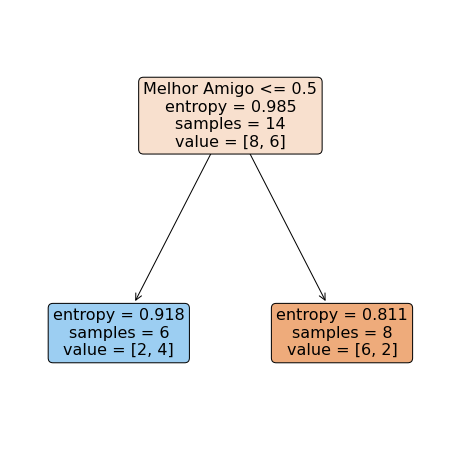

In [12]:
plt.figure(figsize=(8,8))
_ = tree.plot_tree(clf, feature_names = labels, 
             filled=True, fontsize=16, rounded = True)
plt.show()

In [ ]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = 'tree.dot'
os.environ["PATH"] += os.pathsep + 'yourPath/tree.dot'

In [ ]:
# Gerando o gráfico da árvore de decisão
export_graphviz(clf, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
!dot -Tpng tree.dot -o tree.png